In [1]:
import os
import pandas as pd

In [2]:
main_folder = r"C:\Users\devireddy ramreddy\Downloads\bank"
csv_files = []

for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print("✅ Found CSV files:")
for path in csv_files:
    print(path)

✅ Found CSV files:
C:\Users\devireddy ramreddy\Downloads\bank\bank\bank-full.csv
C:\Users\devireddy ramreddy\Downloads\bank\bank\bank.csv
C:\Users\devireddy ramreddy\Downloads\bank\bank-additional\bank-additional\bank-additional-full.csv
C:\Users\devireddy ramreddy\Downloads\bank\bank-additional\bank-additional\bank-additional.csv


In [3]:
file_path = csv_files[0]   

print(f"\n📂 Loading dataset from: {file_path}")

data = pd.read_csv(file_path, sep=';')

print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nColumns:\n", list(data.columns))


📂 Loading dataset from: C:\Users\devireddy ramreddy\Downloads\bank\bank\bank-full.csv
✅ Dataset loaded successfully!
Shape: (45211, 17)

Columns:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [4]:
print("\n🔹 First 5 rows of data:")
print(data.head())


🔹 First 5 rows of data:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print("✅ All categorical columns encoded successfully!")

✅ All categorical columns encoded successfully!


In [6]:
# Features (everything except 'y')
X = data.drop('y', axis=1)

# Target (the column we want to predict)
y = data['y']

print("✅ Features and target separated successfully!")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

✅ Features and target separated successfully!
Shape of X: (45211, 16)
Shape of y: (45211,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("✅ Data split into training and testing sets successfully!")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

✅ Data split into training and testing sets successfully!
Training set: (31647, 16)
Testing set: (13564, 16)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train model
model.fit(X_train, y_train)

print(" Decision Tree model trained successfully!")

 Decision Tree model trained successfully!


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("\n🔹 Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🔹 Model Evaluation Results:
Accuracy: 0.8751843114125627

Confusion Matrix:
 [[11131   835]
 [  858   740]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.46      0.47      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.88      0.87     13564



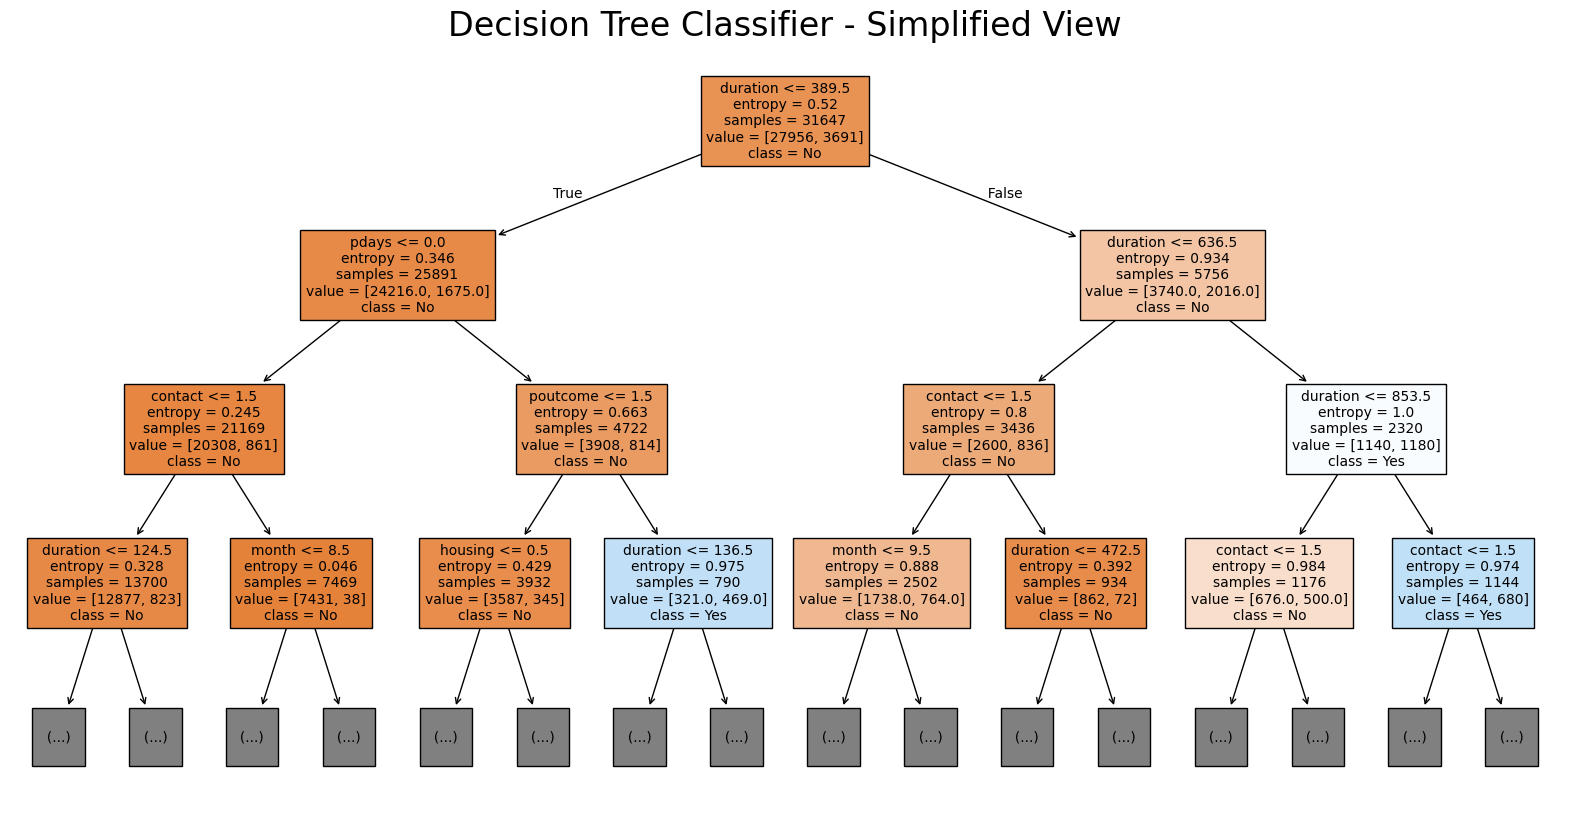

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(
    model,
    max_depth=3,                      # 👈 LIMIT DEPTH
    filled=True,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    fontsize=10                       # 👈 Smaller text
)
plt.title("Decision Tree Classifier - Simplified View", fontsize=24)
plt.show()